In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
result = pd.read_csv('accuracy_final.csv').drop('Unnamed: 0', axis=1)

In [29]:
result = result.append({'Processed Dataset': 'Plasma(Previous Best)', 'Accuracy': 0.8750}, ignore_index=True)
result = result.append({'Processed Dataset': 'Serum(Previous Best)', 'Accuracy': 0.8333}, ignore_index=True)
result

,Processed Dataset,Accuracy
0,Plasma(mix),0.876098
1,Serum(mix),0.866793
2,pca2_plasma(mix),0.891812
3,pca2_serum(mix),0.819712
4,pca3_plasma(mix),0.884868
5,pca3_serum(mix),0.837466
6,pca4_plasma(mix),0.881396
7,pca4_serum(mix),0.851093
8,pca5_plasma(mix),0.890802
9,pca5_serum(mix),0.861888


In [36]:
plasma_best = [['Previous Best', 87.5000], ['Approach 1', 89.0802],\
              ['Approach 2', 87.8560], ['Combined Approach', 89.0802]]
plasma = pd.DataFrame(plasma_best, columns = ['Approaches', 'Accuracy'])
plasma

,Approaches,Accuracy
0,Previous Best,87.5000
1,Approach 1,89.0802
2,Approach 2,87.8560
3,Combined Approach,89.0802


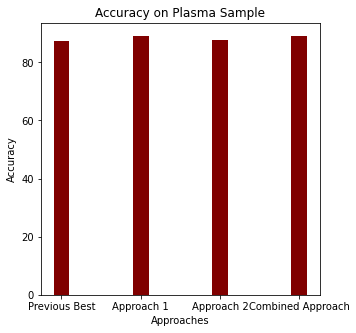

In [41]:
fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(plasma.Approaches, plasma.Accuracy, color ='maroon',width = 0.2)

plt.xlabel("Approaches")
plt.ylabel("Accuracy")
plt.title("Accuracy on Plasma Sample")
plt.show()


In [170]:
both = [['Plasma', 87.50, 89.08, 87.86, 89.08],\
        ['Serum', 83.33, 86.62, 87.03, 86.19]]
both_df = pd.DataFrame(both, columns = ['Samples', 'Previous Best', 'Approach 1', 'Approach 2', 'Combined Approach'])
both_df

,Samples,Previous Best,Approach 1,Approach 2,Combined Approach
0,Plasma,87.50,89.08,87.86,89.08
1,Serum,83.33,86.62,87.03,86.19


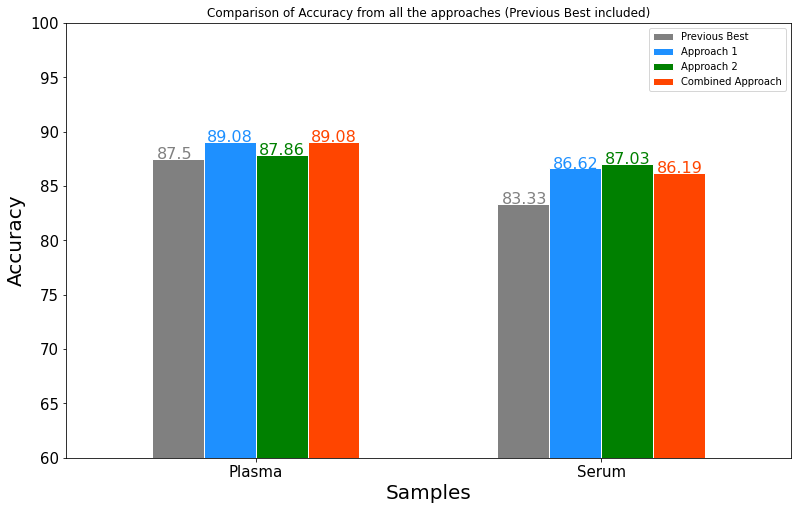

In [229]:
both_df.plot(x='Samples', y=['Previous Best', 'Approach 1', 'Approach 2', 'Combined Approach'], kind="bar", figsize=(13,8), width=0.6, color=['gray','dodgerblue', 'green', 'orangered'], edgecolor='white')

plt.title('Comparison of Accuracy from all the approaches (Previous Best included)')
plt.xlabel('Samples', size = 20)
plt.xticks(rotation='horizontal', size = 15)
plt.yticks(size = 15)
plt.ylabel('Accuracy', size = 20)
plt.legend(loc="upper right")
plt.ylim([60, 100])

# location of annotation
for i, rows in both_df.iterrows():
    plt.annotate(rows["Previous Best"], xy=(i-0.286, rows["Previous Best"]), rotation=0, color="gray", size = 16)
    plt.annotate(rows["Approach 1"], xy=(i-0.14, rows["Approach 1"]), rotation=0, color="dodgerblue", size = 16)
    plt.annotate(rows["Approach 2"], xy=(i+0.01, rows["Approach 2"]), rotation=0, color="green", size = 16)
    plt.annotate(rows["Combined Approach"], xy=(i+0.16, rows["Combined Approach"]), rotation=0, color="orangered", size = 16)

plt.savefig('result.JPG')
plt.show()